In [1]:
import xarray as xr
import cftime 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import os
import time
import logging
import cartopy.crs as ccrs
import metpy  # accessor needed to parse crs
import calendar
import argparse
import seaborn as sns
from shapely.geometry import Point
import geopandas
from geodatasets import get_path
import glob

In [2]:
var = 'VEGC'
vegc_paths = glob.glob('/home/smmrrr/TEM_output_processed/historical_run/forest_lon_lat_pfts/forests_'+var+'*')
soilc_paths = glob.glob('/home/smmrrr/TEM_output_processed/historical_run/forest_lon_lat_pfts/forests_SOILORGC*')
forest_paths = vegc_paths + soilc_paths
forest_paths
# print(len(vegc_paths), ' ', len(soilc_paths))

['/home/smmrrr/TEM_output_processed/historical_run/forest_lon_lat_pfts/forests_VEGC51373.csv',
 '/home/smmrrr/TEM_output_processed/historical_run/forest_lon_lat_pfts/forests_VEGC46361.csv',
 '/home/smmrrr/TEM_output_processed/historical_run/forest_lon_lat_pfts/forests_VEGC50120.csv',
 '/home/smmrrr/TEM_output_processed/historical_run/forest_lon_lat_pfts/forests_VEGC0.csv',
 '/home/smmrrr/TEM_output_processed/historical_run/forest_lon_lat_pfts/forests_VEGC8771.csv',
 '/home/smmrrr/TEM_output_processed/historical_run/forest_lon_lat_pfts/forests_VEGC53879.csv',
 '/home/smmrrr/TEM_output_processed/historical_run/forest_lon_lat_pfts/forests_VEGC30072.csv',
 '/home/smmrrr/TEM_output_processed/historical_run/forest_lon_lat_pfts/forests_VEGC41349.csv',
 '/home/smmrrr/TEM_output_processed/historical_run/forest_lon_lat_pfts/forests_VEGC13783.csv',
 '/home/smmrrr/TEM_output_processed/historical_run/forest_lon_lat_pfts/forests_VEGC28819.csv',
 '/home/smmrrr/TEM_output_processed/historical_run/fore

In [3]:
# temp = pd.read_csv(forest_paths[22])
temp = pd.read_csv( '/home/smmrrr/TEM_output_processed/historical_run/forest_lon_lat_pfts/forests_SOILORGC7518.csv')

In [6]:
len(temp)

9350184

In [8]:
temp.loc[~((temp['lat']==46) & (temp['lon']==-94.5)), 'value_weight'].max()

14030.43

In [9]:
len(temp.loc[~((temp['lat']==46) & (temp['lon']==-94.5))])

9334620

In [11]:
9334620+15564

9350184

In [10]:
len(temp.loc[((temp['lat']==46) & (temp['lon']==-94.5))])

15564

In [20]:
# [(re.search('7518', forest_paths[21]))]

# [(re.search('7518', f)!=None) for f in forest_paths]

In [22]:
all_grids = pd.DataFrame( columns = ['year', 'variable', 'forest_type', 'current_veg', 'stand_age_interval_min',
       'cohort_area', 'land_area', 'value',  'temp', 'value_weight'])

# all_grids = pd.DataFrame( columns = ['lon', 'lat', 'variable', 'pft', 'current_veg', 'year', 'month',
#        'stand_age_interval_min', 'cohort_area', 'land_area', 'value',
#        'temp_weight', 'value_weight', 'forest_type', 'Area', 'prec', 'par',
#        'tair', 'nirr', 'vpr', 'ws10'])
# grids
for file in forest_paths:
    grids = pd.read_csv(file)
    
    if (re.search('7518', file)!=None):
    
        grids = grids.loc[~((grids['lat']==46) & (grids['lon']==-94.5))]
    
    print(grids.value.mean())
    print(grids.value.max())

    if len(grids) >0:
        aggregations = {
         'cohort_area':'sum',
         'land_area':'sum',
         'value':'mean',
            'temp':'sum'
        }
        grids['temp'] = grids['value_weight'] * grids['cohort_area'] 


        grids = grids.groupby([
               'year', 'variable', 'forest_type', 'current_veg', 'stand_age_interval_min']).agg(
        aggregations
        )


        # all_grids =  all_grids.reset_index()

        grids['value_weight'] = grids['temp']/grids['cohort_area']
        grids = grids.reset_index()

        all_grids = pd.concat([all_grids, grids])
        
        
    print(file)
    print(len(all_grids))
all_grids.to_csv('temp_loop_output_vegc_soilc_historical.csv')    

8724.141907057026
35823.3775
/home/smmrrr/TEM_output_processed/historical_run/forest_lon_lat_pfts/forests_VEGC51373.csv
45104
6843.740498663943
35167.94
/home/smmrrr/TEM_output_processed/historical_run/forest_lon_lat_pfts/forests_VEGC46361.csv
88336
8698.49088041724
35850.528
/home/smmrrr/TEM_output_processed/historical_run/forest_lon_lat_pfts/forests_VEGC50120.csv
139062
3205.07482906888
27516.37
/home/smmrrr/TEM_output_processed/historical_run/forest_lon_lat_pfts/forests_VEGC0.csv
152963
11245.178259748596
32341.81
/home/smmrrr/TEM_output_processed/historical_run/forest_lon_lat_pfts/forests_VEGC8771.csv
192249
8295.557255921169
33876.29
/home/smmrrr/TEM_output_processed/historical_run/forest_lon_lat_pfts/forests_VEGC53879.csv
242569
7285.166422863765
31275.634453781517
/home/smmrrr/TEM_output_processed/historical_run/forest_lon_lat_pfts/forests_VEGC30072.csv
281145
2351.2361698511763
24166.33
/home/smmrrr/TEM_output_processed/historical_run/forest_lon_lat_pfts/forests_VEGC41349.csv
3

In [2]:
# grids.columns

loop_out = pd.read_csv('temp_loop_output_vegc_soilc_historical.csv')
len(loop_out)

2543816

In [3]:
loop_out.loc[loop_out['value_weight']>1e10]

,Unnamed: 0,year,variable,forest_type,current_veg,stand_age_interval_min,cohort_area,land_area,value,temp,value_weight


In [4]:
nested_list = [re.findall('Boreal|Temperate|Tropical|Xero', f) for f in loop_out.forest_type]
loop_out['forest_zone'] = [item for sublist in nested_list for item in sublist]


In [5]:
loop_out.loc[1]

Unnamed: 0                               1
year                                  1501
variable                             VEGC 
forest_type               Boreal Woodlands
current_veg                              6
stand_age_interval_min                3000
cohort_area                        2492424
land_area                          5111904
value                           2795.66653
temp                         7179297612.72
value_weight                   2880.447955
forest_zone                         Boreal
Name: 1, dtype: object

In [67]:
loop_out.forest_type.unique()

array(['Boreal Forest', 'Boreal Woodlands', 'Mixed Temperate Forests',
       'Temperate Broadleaved Evergreen Forests',
       'Temperate Coniferous Forests', 'Temperate Deciduous Forests',
       'Tropical Deciduous Forests', 'Tropical Evergreen Forests',
       'Xeromorphic Forests and Woodlands', 'Forested Boreal Wetlands',
       'Temperate Forested Wetlands', 'Tropical Forested Wetlands',
       'Temperate Forested Floodplains', 'Tropical Forested Floodplains'],
      dtype=object)

In [68]:
aggregations = {
 'cohort_area':'sum',
 'land_area':'sum',
    'temp':'sum'
}
loop_out['temp'] = loop_out['value_weight'] * loop_out['cohort_area'] 

loop_out = loop_out.loc[loop_out['forest_type'].isin(['Boreal Forest'
         ,'Mixed Temperate Forests',
       'Temperate Broadleaved Evergreen Forests',
       'Temperate Coniferous Forests', 'Temperate Deciduous Forests',
       'Tropical Deciduous Forests', 'Tropical Evergreen Forests',])]

all_years = loop_out.groupby([
       'year', 'variable', 'forest_type','forest_zone', 'current_veg', 'stand_age_interval_min']).agg(
aggregations
)


##make a table for all the pfts
all_grids = loop_out.groupby([
        'variable', 'forest_type','forest_zone', 'current_veg', 'stand_age_interval_min']).agg(
aggregations
)


all_grids =  all_grids.loc[all_grids['cohort_area']>0].reset_index()

all_grids['value_weight'] = all_grids['temp']/all_grids['cohort_area']
all_grids = all_grids.reset_index()

###make a table for all the BROAD pfts 
pfts = loop_out.groupby([
        'variable', 'forest_zone', 'stand_age_interval_min']).agg(
aggregations
)


all_grids =  all_grids.loc[all_grids['cohort_area']>0]

all_grids['value_weight'] = all_grids['temp']/all_grids['cohort_area']
all_grids = all_grids.reset_index()

pfts =  pfts.loc[pfts['cohort_area']>0]

pfts['value_weight'] = pfts['temp']/pfts['cohort_area']
pfts = pfts.reset_index()


print(len(all_grids), len(pfts))

182 78


In [30]:
all_grids

,level_0,index,variable,forest_type,forest_zone,current_veg,stand_age_interval_min,cohort_area,land_area,temp,value_weight
0,0,0,SOILORGC,Boreal Forest,Boreal,4,10,610782960,246757837236,4.926490e+12,8065.859465
1,1,1,SOILORGC,Boreal Forest,Boreal,4,20,491709744,193972532484,3.633347e+12,7389.211897
2,2,2,SOILORGC,Boreal Forest,Boreal,4,30,436449588,173715122640,3.234574e+12,7411.105405
3,3,3,SOILORGC,Boreal Forest,Boreal,4,40,391452348,161584585680,2.920877e+12,7461.641157
4,4,4,SOILORGC,Boreal Forest,Boreal,4,50,354024204,151623726840,2.660771e+12,7515.788356
...,...,...,...,...,...,...,...,...,...,...,...
359,359,359,VEGC,Xeromorphic Forests and Woodlands,Xero,19,90,17611140,15776162244,6.054617e+09,343.794728
360,360,360,VEGC,Xeromorphic Forests and Woodlands,Xero,19,100,16445172,14848362408,4.338805e+09,263.834587
361,361,361,VEGC,Xeromorphic Forests and Woodlands,Xero,19,125,35161248,32531497680,4.685405e+09,133.254795
362,362,362,VEGC,Xeromorphic Forests and Woodlands,Xero,19,150,29500272,27140176440,2.052961e+09,69.591240


In [8]:
pfts

,variable,forest_zone,stand_age_interval_min,cohort_area,land_area,temp,value_weight
0,SOILORGC,Boreal,10,698032200,325325324064,5.305594e+12,7600.787251
1,SOILORGC,Boreal,20,548542116,235362658224,3.911273e+12,7130.306627
2,SOILORGC,Boreal,30,477099672,192083934300,3.481142e+12,7296.466683
3,SOILORGC,Boreal,40,424708752,175122435552,3.150396e+12,7417.779783
4,SOILORGC,Boreal,50,380982840,162393330852,2.866640e+12,7524.328425
...,...,...,...,...,...,...,...
99,VEGC,Xero,90,17611140,15776162244,6.054617e+09,343.794728
100,VEGC,Xero,100,16445172,14848362408,4.338805e+09,263.834587
101,VEGC,Xero,125,35161248,32531497680,4.685405e+09,133.254795
102,VEGC,Xero,150,29500272,27140176440,2.052961e+09,69.591240


In [47]:
all_grids['land_area']=all_grids['land_area'].astype(float)
all_grids['cohort_area']=all_grids['cohort_area'].astype(float)
all_grids['value_weight']=all_grids['value_weight'].astype(float)
all_grids.describe()
# all_grids

,level_0,index,current_veg,stand_age_interval_min,cohort_area,land_area,temp,value_weight
count,364.000000,364.000000,364.000000,364.000000,3.640000e+02,3.640000e+02,3.640000e+02,364.000000
mean,181.500000,181.500000,14.357143,294.230769,1.514473e+09,1.154998e+11,1.320182e+13,7038.827416
std,105.221988,105.221988,8.034288,783.144373,7.700339e+09,3.633793e+11,8.602015e+13,4487.497073
min,0.000000,0.000000,4.000000,10.000000,9.079200e+04,9.362296e+07,1.877173e+08,69.591240
25%,90.750000,90.750000,8.000000,40.000000,2.866368e+06,1.775532e+09,1.142389e+10,3983.155669
50%,181.500000,181.500000,13.500000,70.000000,3.731296e+07,3.407781e+10,2.256158e+11,6289.884432
75%,272.250000,272.250000,19.000000,100.000000,1.352114e+08,1.107114e+11,7.810695e+11,9269.935569
max,363.000000,363.000000,33.000000,3000.000000,7.232237e+10,4.284971e+12,1.287462e+15,20353.363648


In [7]:
all_grids.dtypes

index                       int64
year                        int64
variable                   object
forest_type                object
current_veg                 int64
stand_age_interval_min      int64
cohort_area               float64
land_area                 float64
temp                       object
value_weight               object
dtype: object

In [21]:
all_grids2.groupby('forest_type')['vegc_weight'].mean()

forest_type
Boreal Forest                               4625.139855
Boreal Woodlands                            4640.429443
Forested Boreal Wetlands                    4280.554927
Mixed Temperate Forests                     7911.800831
Temperate Broadleaved Evergreen Forests    10568.649070
Temperate Coniferous Forests                5979.728128
Temperate Deciduous Forests                12543.128504
Temperate Forested Floodplains              2357.375452
Temperate Forested Wetlands                16716.383428
Tropical Deciduous Forests                  8087.510838
Tropical Evergreen Forests                 13793.217470
Tropical Forested Floodplains              16243.115223
Tropical Forested Wetlands                 12002.292003
Xeromorphic Forests and Woodlands            216.977857
Name: vegc_weight, dtype: float64

In [9]:
all_grids.loc[all_grids['variable']==' VEGC '].groupby('forest_type')['value_weight'].mean()

forest_type
Boreal Forest                               4050.261847
Boreal Woodlands                            4190.976524
Forested Boreal Wetlands                    4766.281142
Mixed Temperate Forests                     7621.340594
Temperate Broadleaved Evergreen Forests     9617.463379
Temperate Coniferous Forests                7819.123101
Temperate Deciduous Forests                11357.772460
Temperate Forested Floodplains              7016.131934
Temperate Forested Wetlands                10645.240682
Tropical Deciduous Forests                 11810.222215
Tropical Evergreen Forests                 15169.470890
Tropical Forested Floodplains              16243.115223
Tropical Forested Wetlands                 10883.638770
Xeromorphic Forests and Woodlands            374.909838
Name: value_weight, dtype: float64

In [49]:
all_grids.loc[all_grids['variable']==' SOILORGC '].groupby('forest_type')['value_weight'].mean()

forest_type
Boreal Forest                              8032.908173
Boreal Woodlands                           7932.346428
Forested Boreal Wetlands                   7274.169019
Mixed Temperate Forests                    5292.724114
Temperate Broadleaved Evergreen Forests    4218.415330
Temperate Coniferous Forests               6204.507734
Temperate Deciduous Forests                5589.023318
Temperate Forested Floodplains             4288.519477
Temperate Forested Wetlands                2734.303062
Tropical Deciduous Forests                 4314.888127
Tropical Evergreen Forests                 6121.102532
Tropical Forested Floodplains              6419.501762
Tropical Forested Wetlands                 5435.961019
Xeromorphic Forests and Woodlands          1662.848954
Name: value_weight, dtype: float64

In [10]:
all_grids['stand_age_interval_min'].unique() 

array([  10,   20,   30,   40,   50,   60,   70,   80,   90,  100,  125,
        150, 3000])

In [69]:
all_grids2 = all_grids.loc[(all_grids['stand_age_interval_min' ]<=150)  
                          ]
pfts2 = pfts.loc[(pfts['stand_age_interval_min' ]<=150)  
                          ]
pfts2 = pfts2.loc[pfts2['forest_zone']!='Xero']

In [14]:
all_grids2['value_weight'].max()

# np.arange(0, 121, 20)

20353.363648434337

In [21]:
all_grids

,level_0,index,variable,forest_type,current_veg,stand_age_interval_min,cohort_area,land_area,temp,value_weight
0,0,0,SOILORGC,Boreal Forest,4,10,610782960,246757837236,4.926490e+12,8065.859465
1,1,1,SOILORGC,Boreal Forest,4,20,491709744,193972532484,3.633347e+12,7389.211897
2,2,2,SOILORGC,Boreal Forest,4,30,436449588,173715122640,3.234574e+12,7411.105405
3,3,3,SOILORGC,Boreal Forest,4,40,391452348,161584585680,2.920877e+12,7461.641157
4,4,4,SOILORGC,Boreal Forest,4,50,354024204,151623726840,2.660771e+12,7515.788356
...,...,...,...,...,...,...,...,...,...,...
359,359,359,VEGC,Xeromorphic Forests and Woodlands,19,90,17611140,15776162244,6.054617e+09,343.794728
360,360,360,VEGC,Xeromorphic Forests and Woodlands,19,100,16445172,14848362408,4.338805e+09,263.834587
361,361,361,VEGC,Xeromorphic Forests and Woodlands,19,125,35161248,32531497680,4.685405e+09,133.254795
362,362,362,VEGC,Xeromorphic Forests and Woodlands,19,150,29500272,27140176440,2.052961e+09,69.591240


In [54]:
# all_grids3 = 
all_grids3 = all_grids2.pivot(index = ['forest_type', 'stand_age_interval_min'], columns = 'variable', values = 'value_weight')
all_grids3.reset_index(inplace=True)

# all_grids3 = 
pfts3 = pfts2.pivot(index = ['forest_zone', 'stand_age_interval_min'], columns = 'variable', values = 'value_weight')
pfts3.reset_index(inplace=True)

In [44]:
all_grids3.columns

Index(['forest_type', 'stand_age_interval_min', ' SOILORGC ', ' VEGC '], dtype='object', name='variable')

In [81]:
pfts3 = pfts3.loc[pfts3['forest_zone']!='Xero']


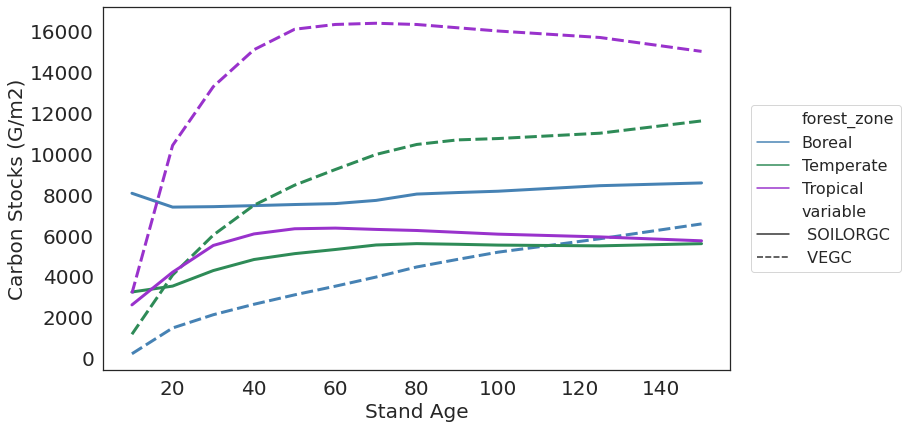

In [70]:
sns.set(style="white")

# Create the line plot using Seaborn's lineplot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed

custom_palette = {'Boreal': 'steelblue', 'Temperate': 'seagreen', 'Tropical':'darkorchid'}

# Specify the x-axis as 'time', y-axis as 'variable1' and color the lines by 'group'
sns.lineplot(x='stand_age_interval_min', y='value_weight', hue='forest_zone',palette=custom_palette, style = 'variable', linewidth = 3, data=pfts2)

# Add the second variable to the same plot
# sns.lineplot(x='stand_age_interval_min', y=' SOILORGC ', style='forest_zone', color = 'brown', linewidth = 3, data=pfts3, markers=True, legend=False)

plt.xlabel('Stand Age', fontsize = 20)
plt.ylabel('Carbon Stocks (G/m2)', fontsize = 20)
plt.tight_layout()  # Ensure labels are not cut off
plt.tick_params(axis='both', labelsize=20)
plt.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), title='', prop={'size': 16})
plt.show()



In [26]:
all_grids

,level_0,index,variable,forest_type,current_veg,stand_age_interval_min,cohort_area,land_area,temp,value_weight
0,0,0,SOILORGC,Boreal Forest,4,10,610782960,246757837236,4.926490e+12,8065.859465
1,1,1,SOILORGC,Boreal Forest,4,20,491709744,193972532484,3.633347e+12,7389.211897
2,2,2,SOILORGC,Boreal Forest,4,30,436449588,173715122640,3.234574e+12,7411.105405
3,3,3,SOILORGC,Boreal Forest,4,40,391452348,161584585680,2.920877e+12,7461.641157
4,4,4,SOILORGC,Boreal Forest,4,50,354024204,151623726840,2.660771e+12,7515.788356
...,...,...,...,...,...,...,...,...,...,...
359,359,359,VEGC,Xeromorphic Forests and Woodlands,19,90,17611140,15776162244,6.054617e+09,343.794728
360,360,360,VEGC,Xeromorphic Forests and Woodlands,19,100,16445172,14848362408,4.338805e+09,263.834587
361,361,361,VEGC,Xeromorphic Forests and Woodlands,19,125,35161248,32531497680,4.685405e+09,133.254795
362,362,362,VEGC,Xeromorphic Forests and Woodlands,19,150,29500272,27140176440,2.052961e+09,69.591240


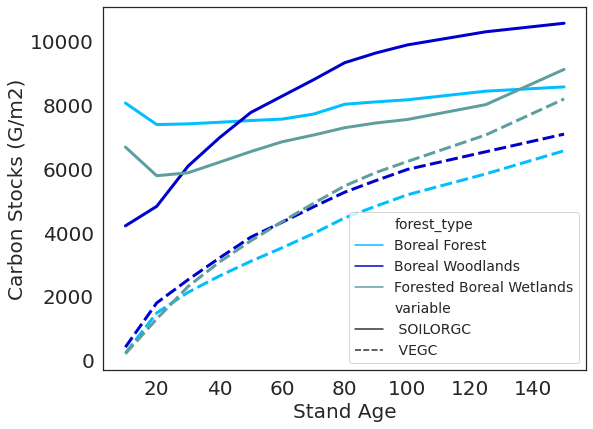

In [51]:
sns.set(style="white")
plot_data = all_grids2.loc[all_grids2['forest_zone']=='Boreal']
# Create the line plot using Seaborn's lineplot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed

# custom_palette = {'Boreal Forest': 'deepskyblue', 'Boreal Woodlands': 'mediumblue', 'Forested Boreal Wetlands':'cadetblue'}

# Specify the x-axis as 'time', y-axis as 'variable1' and color the lines by 'group'
sns.lineplot(x='stand_age_interval_min', y='value_weight', hue='forest_type' ,color = 
             , style = 'variable', linewidth = 3, data=plot_data)

# Add the second variable to the same plot
# sns.lineplot(x='stand_age_interval_min', y=' SOILORGC ', style='forest_zone', color = 'brown', linewidth = 3, data=pfts3, markers=True, legend=False)

plt.xlabel('Stand Age', fontsize = 20)
plt.ylabel('Carbon Stocks (G/m2)', fontsize = 20)
plt.tight_layout()  # Ensure labels are not cut off
plt.tick_params(axis='both', labelsize=20)
plt.legend( title='', prop={'size': 14})

plt.show()



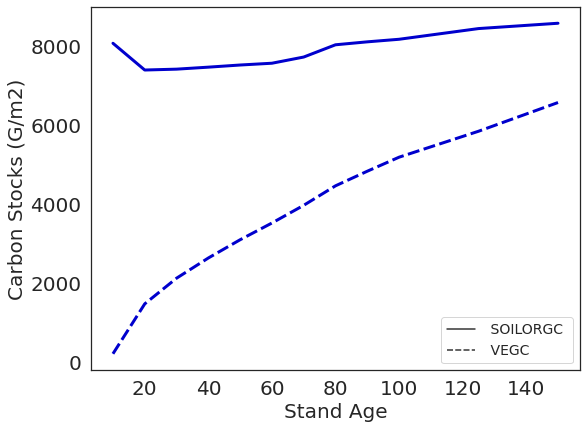

In [80]:
sns.set(style="white")
plot_data = all_grids2.loc[all_grids2['forest_type'].isin([
                                               'Boreal Forest'
                                                        # ,'Temperate Coniferous Forests'
                                                        # ,'Temperate Deciduous Forests'
                                                          ])]
# Create the line plot using Seaborn's lineplot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed

# custom_palette = {'Mixed Temperate Forests': 'darkgreen', 'Temperate Coniferous Forests': 'mediumseagreen', 'Temperate Deciduous Forests':'lime'}
custom_palette = {'Mixed Temperate Forests': 'lime'}

# Specify the x-axis as 'time', y-axis as 'variable1' and color the lines by 'group'
sns.lineplot(x='stand_age_interval_min', y='value_weight'
             ,color='mediumblue'
             , style = 'variable', linewidth = 3, data=plot_data)

# Add the second variable to the same plot
# sns.lineplot(x='stand_age_interval_min', y=' SOILORGC ', style='forest_zone', color = 'brown', linewidth = 3, data=pfts3, markers=True, legend=False)

plt.xlabel('Stand Age', fontsize = 20)
plt.ylabel('Carbon Stocks (G/m2)', fontsize = 20)
plt.tight_layout()  # Ensure labels are not cut off
plt.tick_params(axis='both', labelsize=20)
plt.legend( title='', prop={'size': 14})

plt.show()



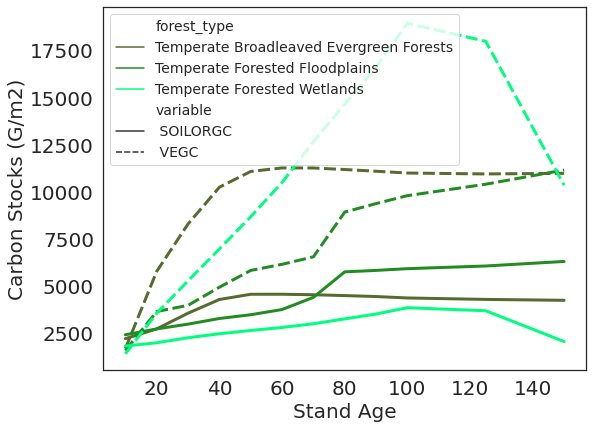

In [66]:
sns.set(style="white")
plot_data = all_grids2.loc[all_grids2['forest_type'].isin(['Temperate Broadleaved Evergreen Forests'
                                                        ,'Temperate Forested Floodplains'
                                                        ,'Temperate Forested Wetlands'])]
# Create the line plot using Seaborn's lineplot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed

custom_palette = {'Temperate Broadleaved Evergreen Forests': 'darkolivegreen', 'Temperate Forested Floodplains': 'forestgreen', 'Temperate Forested Wetlands':'springgreen'}

# Specify the x-axis as 'time', y-axis as 'variable1' and color the lines by 'group'
sns.lineplot(x='stand_age_interval_min', y='value_weight', hue='forest_type' ,palette=custom_palette
             , style = 'variable', linewidth = 3, data=plot_data)

# Add the second variable to the same plot
# sns.lineplot(x='stand_age_interval_min', y=' SOILORGC ', style='forest_zone', color = 'brown', linewidth = 3, data=pfts3, markers=True, legend=False)

plt.xlabel('Stand Age', fontsize = 20)
plt.ylabel('Carbon Stocks (G/m2)', fontsize = 20)
plt.tight_layout()  # Ensure labels are not cut off
plt.tick_params(axis='both', labelsize=20)
plt.legend( title='', prop={'size': 14})

plt.show()



In [56]:
all_grids2.loc[all_grids2['forest_zone']=='Temperate'].forest_type.unique()

array(['Mixed Temperate Forests',
       'Temperate Broadleaved Evergreen Forests',
       'Temperate Coniferous Forests', 'Temperate Deciduous Forests',
       'Temperate Forested Floodplains', 'Temperate Forested Wetlands'],
      dtype=object)

In [62]:
all_grids2.loc[all_grids2['forest_zone']=='Tropical'].forest_type.unique()



array(['Tropical Deciduous Forests', 'Tropical Evergreen Forests',
       'Tropical Forested Floodplains', 'Tropical Forested Wetlands'],
      dtype=object)

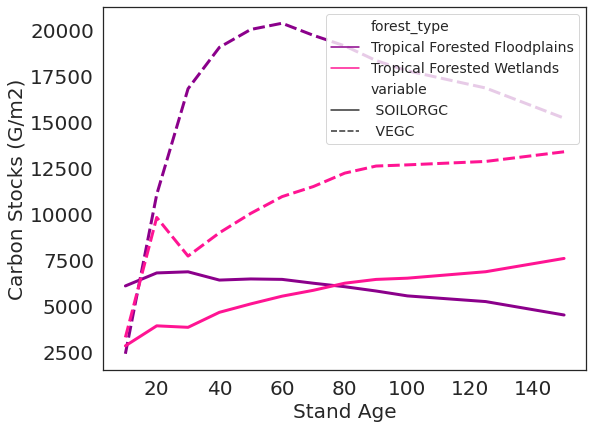

In [65]:
sns.set(style="white")
plot_data = all_grids2.loc[all_grids2['forest_type'].isin(['Tropical Forested Floodplains'
                                                        ,'Tropical Forested Wetlands'])]
# Create the line plot using Seaborn's lineplot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed

custom_palette = {'Tropical Forested Floodplains': 'darkmagenta', 'Tropical Forested Wetlands': 'deeppink'}

# Specify the x-axis as 'time', y-axis as 'variable1' and color the lines by 'group'
sns.lineplot(x='stand_age_interval_min', y='value_weight', hue='forest_type' ,palette=custom_palette
             , style = 'variable', linewidth = 3, data=plot_data)

# Add the second variable to the same plot
# sns.lineplot(x='stand_age_interval_min', y=' SOILORGC ', style='forest_zone', color = 'brown', linewidth = 3, data=pfts3, markers=True, legend=False)

plt.xlabel('Stand Age', fontsize = 20)
plt.ylabel('Carbon Stocks (G/m2)', fontsize = 20)
plt.tight_layout()  # Ensure labels are not cut off
plt.tick_params(axis='both', labelsize=20)
plt.legend( title='', prop={'size': 14})

plt.show()



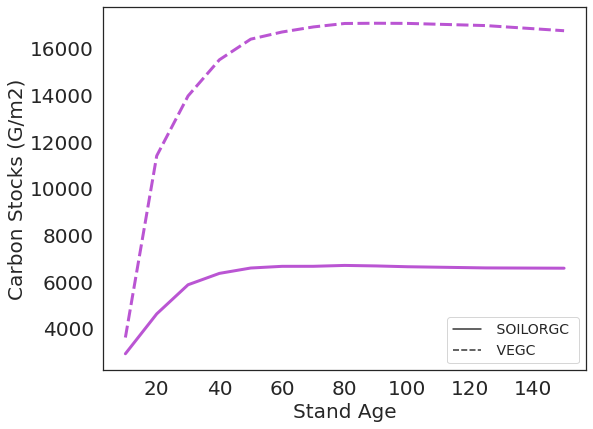

In [82]:
sns.set(style="white")
plot_data = all_grids2.loc[all_grids2['forest_type'].isin([
    # 'Tropical Deciduous Forests'
                                                        'Tropical Evergreen Forests'
                                                          ])]
# Create the line plot using Seaborn's lineplot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed

custom_palette = {'Tropical Evergreen Forests': 'indigo', 'Tropical Deciduous Forests': 'mediumorchid'}

# Specify the x-axis as 'time', y-axis as 'variable1' and color the lines by 'group'
sns.lineplot(x='stand_age_interval_min', y='value_weight'
             ,color='mediumorchid'
             , style = 'variable', linewidth = 3, data=plot_data)

# Add the second variable to the same plot
# sns.lineplot(x='stand_age_interval_min', y=' SOILORGC ', style='forest_zone', color = 'brown', linewidth = 3, data=pfts3, markers=True, legend=False)

plt.xlabel('Stand Age', fontsize = 20)
plt.ylabel('Carbon Stocks (G/m2)', fontsize = 20)
plt.tight_layout()  # Ensure labels are not cut off
plt.tick_params(axis='both', labelsize=20)
plt.legend( title='', prop={'size': 14})

plt.show()



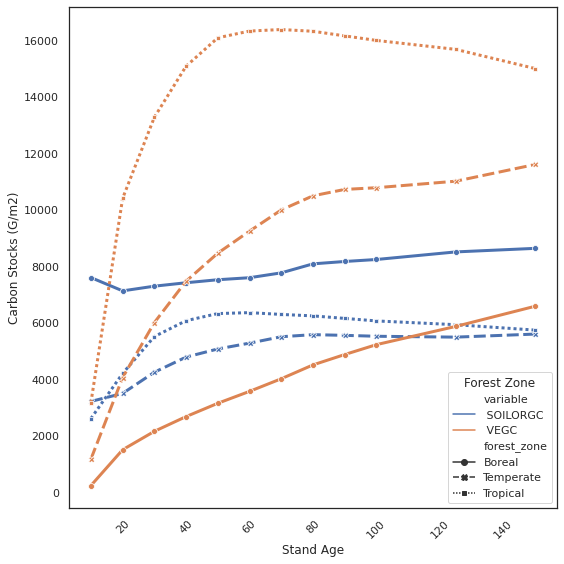

In [84]:
sns.set(style="white")

# Create the line plot using Seaborn's lineplot
plt.figure(figsize=(8, 8))  # Adjust figure size if needed

# Specify the x-axis as 'time', y-axis as 'variable1' and color the lines by 'group'
sns.lineplot(x='stand_age_interval_min', y='value_weight', style='forest_zone', hue = 'variable', linewidth = 3, data=pfts2, markers=True)

# Add the second variable to the same plot
# sns.lineplot(x='stand_age_interval_min', y=' SOILORGC ', style='forest_zone', color = 'brown', linewidth = 3, data=pfts3, markers=True, legend=False)

plt.xlabel('Stand Age')
plt.ylabel('Carbon Stocks (G/m2)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure labels are not cut off
plt.legend(title='Forest Zone')  # Add legend with 'Group' as the title

plt.show()



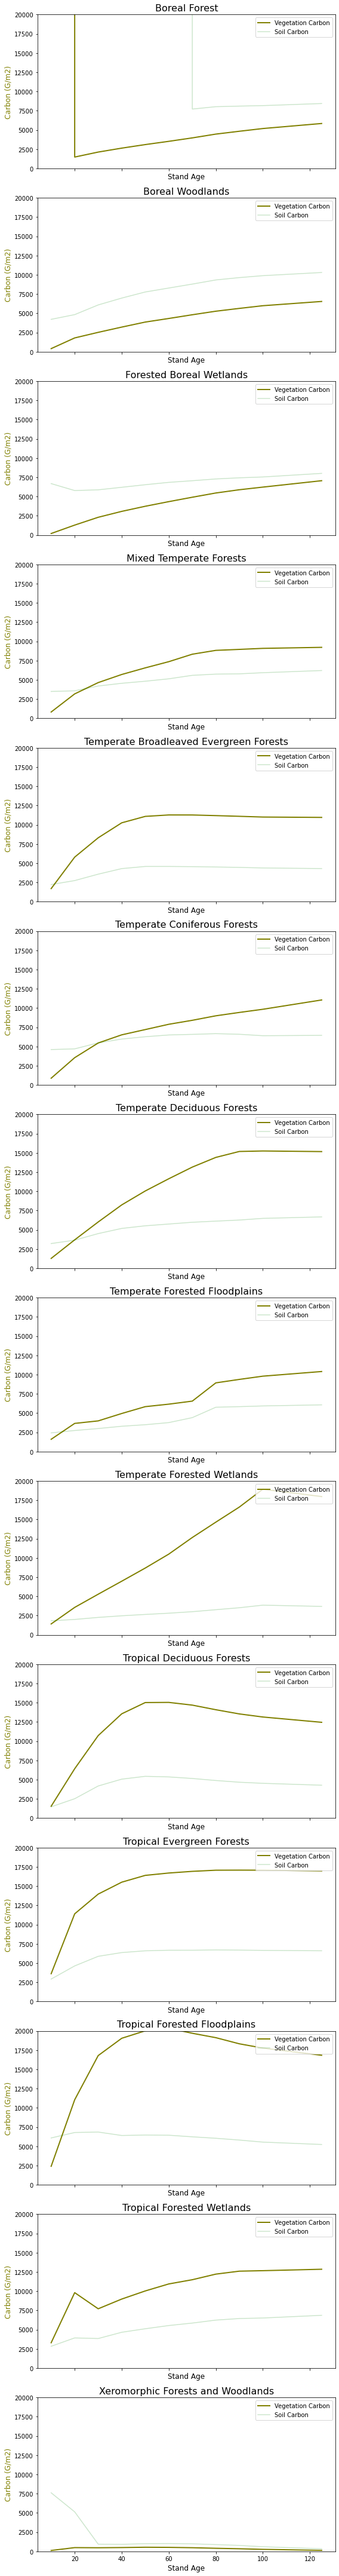

In [51]:
# all_grids3 = 
all_grids3 = all_grids2.pivot(index = ['forest_type', 'stand_age_interval_min'], columns = 'variable', values = 'value_weight')
all_grids3.reset_index(inplace=True)

# tics = np.arange(0, 121, 20)
# Group the data by the 'group' column
groups = all_grids3.groupby('forest_type')

# Create subplots for each group
fig, axs = plt.subplots(len(groups),1, sharex=True,  figsize=(8, 60))
# Iterate over each group and plot the data
# for i, (group, all_grids3) in enumerate(groups):
#     axs[i].plot(all_grids3['stand_age'], all_grids3['vegc_weight'])
#     axs[i].set_ylabel(f'Group {group}')
for i, (group, all_grids3) in enumerate(groups):
    ax1 = axs[i]  # Line plot axis
    # ax2 = ax1.twinx()  # Bar plot axis

    # Line plot
    ax1.plot(all_grids3['stand_age_interval_min'], all_grids3[' VEGC '], color='olive', linewidth=2)
    ax1.set_ylabel('Carbon (G/m2)', color='olive', fontsize=12)

    # Bar plot
    ax1.plot(all_grids3['stand_age_interval_min'], all_grids3[' SOILORGC '], color='green', alpha=.2)
    # ax1.set_ylabel('Cohort Area', color='green', fontsize=12)

    # Set y-axis limits for each variable
    ax1.set_ylim(0, 20000)
    # ax2.set_ylim(0, all_grids2['cohort_area'].max())

    # Add a legend for each variable
    ax1.legend(['Vegetation Carbon','Soil Carbon'], loc='upper right', fontsize=10)
    # ax2.legend(['Soil Carbon'], loc='upper right', fontsize=10)

    # Set common x-label for the entire subplot
    ax1.set_xlabel('Stand Age', fontsize=12)
    # ax1.tick_params(axis='x', width=25)
    # ax1.set_xticks(tics)
    # ax1.set_xticklabels(tics)

    ax1.set_title(f'{group}', fontsize=16)
# Set common labels and title
# plt.xlabel('Stand Age')
# plt.suptitle('Individual Plots for Each Group')

# Adjust subplot spacing
plt.tight_layout()

# Display the plot
plt.show()


KeyError: 'stand_age'

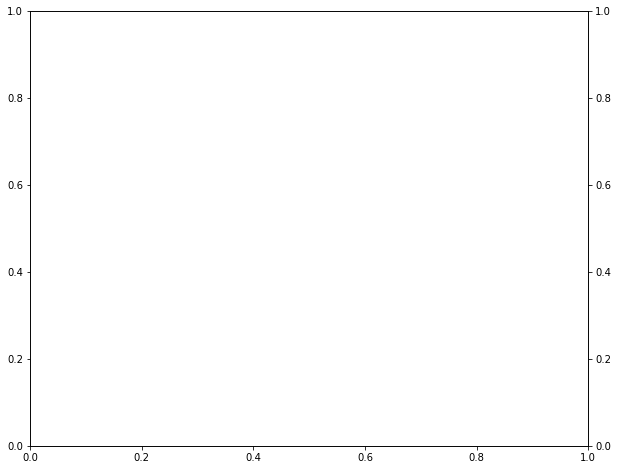

In [22]:

fig, axs = plt.subplots(  figsize=(10, 8))
group = "Boreal Forest"
all_grids3 = all_grids2.loc[all_grids2['forest_type']==group]
ax1 = axs   # Line plot axis
ax2 = ax1.twinx()  # Bar plot axis

# Line plot
ax1.plot(all_grids3['stand_age'], all_grids3['vegc_weight'], color='olive', linewidth=2)
ax1.set_ylabel('Total Carbon (grams / meter)', color='olive', fontsize=22)

# Bar plot
ax2.bar(all_grids3['stand_age'], all_grids3['cohort_area'], color='green', alpha=.2)
ax2.set_ylabel('Area (square km)', color='green', fontsize=22)

# Set y-axis limits for each variable
ax1.set_ylim(0, all_grids2['vegc_weight'].max())
ax2.set_ylim(0, all_grids2['cohort_area'].max())

# Add a legend for each variable
ax1.legend(['Total Carbon'], loc='upper left', fontsize=16)
ax2.legend(['Area'], loc='upper right', fontsize=16)
ax1.tick_params(axis='both', labelsize=16)
ax2.tick_params(axis='both', labelsize=16)
# Set common x-label for the entire subplot
ax1.set_xlabel('Stand Age', fontsize=22)
# ax1.tick_params(axis='x', width=25)
# ax1.set_xticks(tics)
# ax1.set_xticklabels(tics)

ax1.set_title(f'{group}', fontsize=32)
# Set common labels and title
# plt.xlabel('Stand Age')
# plt.suptitle('Individual Plots for Each Group')

# Adjust subplot spacing
plt.tight_layout()

# Display the plot
plt.show()


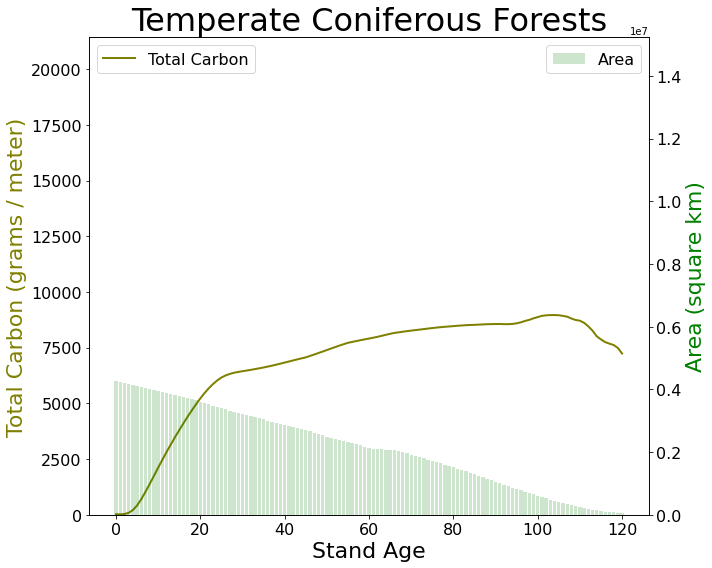

In [21]:

fig, axs = plt.subplots(  figsize=(10, 8))
group = "Temperate Coniferous Forests"
all_grids3 = all_grids2.loc[all_grids2['forest_type']==group]
ax1 = axs   # Line plot axis
ax2 = ax1.twinx()  # Bar plot axis


# Line plot
ax1.plot(all_grids3['stand_age'], all_grids3['vegc_weight'], color='olive', linewidth=2)
ax1.set_ylabel('Total Carbon (grams / meter)', color='olive', fontsize=22)

# Bar plot
ax2.bar(all_grids3['stand_age'], all_grids3['cohort_area'], color='green', alpha=.2)
ax2.set_ylabel('Area (square km)', color='green', fontsize=22)

# Set y-axis limits for each variable
ax1.set_ylim(0, all_grids2['vegc_weight'].max())
ax2.set_ylim(0, all_grids2['cohort_area'].max())

# Add a legend for each variable
ax1.legend(['Total Carbon'], loc='upper left', fontsize=16)
ax2.legend(['Area'], loc='upper right', fontsize=16)
ax1.tick_params(axis='both', labelsize=16)
ax2.tick_params(axis='both', labelsize=16)
# Set common x-label for the entire subplot
ax1.set_xlabel('Stand Age', fontsize=22)
# ax1.tick_params(axis='x', width=25)
# ax1.set_xticks(tics)
# ax1.set_xticklabels(tics)

ax1.set_title(f'{group}', fontsize=32)
# Set common labels and title
# plt.xlabel('Stand Age')
# plt.suptitle('Individual Plots for Each Group')

# Adjust subplot spacing
plt.tight_layout()

# Display the plot
plt.show()


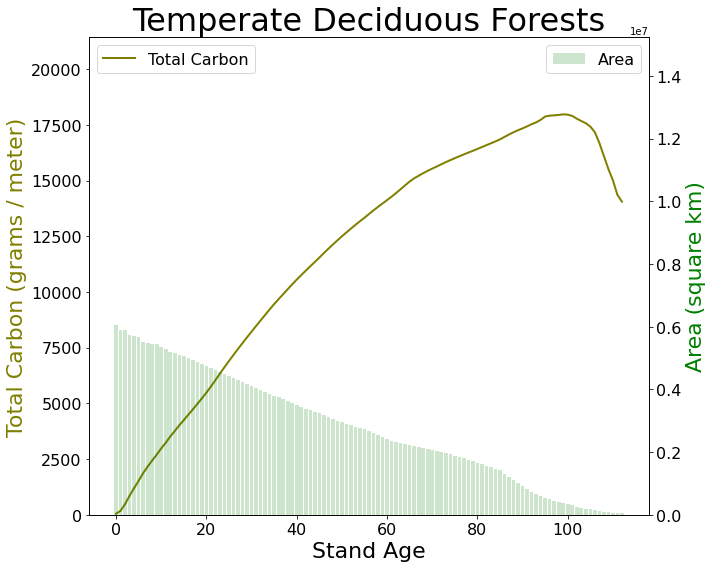

In [22]:

fig, axs = plt.subplots(  figsize=(10, 8))
group = "Temperate Deciduous Forests"
all_grids3 = all_grids2.loc[all_grids2['forest_type']==group]
ax1 = axs   # Line plot axis
ax2 = ax1.twinx()  # Bar plot axis


# Line plot
ax1.plot(all_grids3['stand_age'], all_grids3['vegc_weight'], color='olive', linewidth=2)
ax1.set_ylabel('Total Carbon (grams / meter)', color='olive', fontsize=22)

# Bar plot
ax2.bar(all_grids3['stand_age'], all_grids3['cohort_area'], color='green', alpha=.2)
ax2.set_ylabel('Area (square km)', color='green', fontsize=22)

# Set y-axis limits for each variable
ax1.set_ylim(0, all_grids2['vegc_weight'].max())
ax2.set_ylim(0, all_grids2['cohort_area'].max())

# Add a legend for each variable
ax1.legend(['Total Carbon'], loc='upper left', fontsize=16)
ax2.legend(['Area'], loc='upper right', fontsize=16)
ax1.tick_params(axis='both', labelsize=16)
ax2.tick_params(axis='both', labelsize=16)
# Set common x-label for the entire subplot
ax1.set_xlabel('Stand Age', fontsize=22)
# ax1.tick_params(axis='x', width=25)
# ax1.set_xticks(tics)
# ax1.set_xticklabels(tics)

ax1.set_title(f'{group}', fontsize=32)
# Set common labels and title
# plt.xlabel('Stand Age')
# plt.suptitle('Individual Plots for Each Group')

# Adjust subplot spacing
plt.tight_layout()

# Display the plot
plt.show()


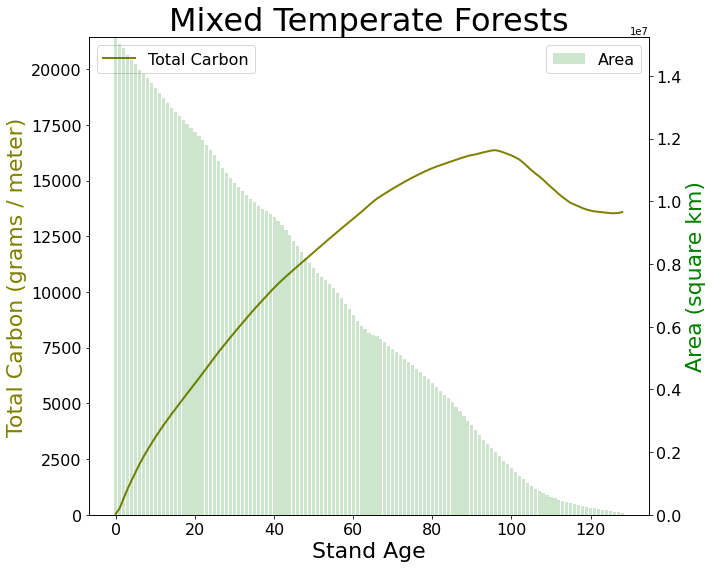

In [23]:

fig, axs = plt.subplots(  figsize=(10, 8))
group = "Mixed Temperate Forests"
all_grids3 = all_grids2.loc[all_grids2['forest_type']==group]
ax1 = axs   # Line plot axis
ax2 = ax1.twinx()  # Bar plot axis


# Line plot
ax1.plot(all_grids3['stand_age'], all_grids3['vegc_weight'], color='olive', linewidth=2)
ax1.set_ylabel('Total Carbon (grams / meter)', color='olive', fontsize=22)

# Bar plot
ax2.bar(all_grids3['stand_age'], all_grids3['cohort_area'], color='green', alpha=.2)
ax2.set_ylabel('Area (square km)', color='green', fontsize=22)

# Set y-axis limits for each variable
ax1.set_ylim(0, all_grids2['vegc_weight'].max())
ax2.set_ylim(0, all_grids2['cohort_area'].max())

# Add a legend for each variable
ax1.legend(['Total Carbon'], loc='upper left', fontsize=16)
ax2.legend(['Area'], loc='upper right', fontsize=16)
ax1.tick_params(axis='both', labelsize=16)
ax2.tick_params(axis='both', labelsize=16)
# Set common x-label for the entire subplot
ax1.set_xlabel('Stand Age', fontsize=22)
# ax1.tick_params(axis='x', width=25)
# ax1.set_xticks(tics)
# ax1.set_xticklabels(tics)

ax1.set_title(f'{group}', fontsize=32)
# Set common labels and title
# plt.xlabel('Stand Age')
# plt.suptitle('Individual Plots for Each Group')

# Adjust subplot spacing
plt.tight_layout()

# Display the plot
plt.show()


In [28]:
all_grids2 = all_grids2.loc[(all_grids2['stand_age_interval_min' ]<300)
                         & (all_grids2['cohort_area' ]>50000)
                          ]

# all_grids2 = all_grids2.loc[(all_grids2['stand_age' ]<150)
#                            & (all_grids2['cohort_area' ]>50000)
#                           ]

In [27]:
all_grids2.describe()

,current_veg,stand_age_interval_min,cohort_area,land_area,value_weight,temp,vegc_weight
count,168.000000,168.000000,1.680000e+02,1.680000e+02,168.000000,1.680000e+02,168.000000
mean,14.357143,68.750000,3.605445e+07,3.480886e+10,7096.045519,1.826129e+11,8257.721651
std,8.047230,40.850795,1.049743e+08,1.248606e+11,5402.255071,4.892286e+11,6088.555100
min,4.000000,10.000000,3.469200e+04,6.617869e+07,87.946350,1.039924e+07,6.427647
25%,8.000000,37.500000,1.031574e+06,9.282008e+08,2394.082887,5.088466e+09,3264.487827
50%,13.500000,65.000000,9.509868e+06,7.877737e+09,5777.024130,3.904614e+10,7192.782154
75%,19.000000,92.500000,3.312172e+07,2.766083e+10,11320.513732,2.151497e+11,12474.777397
max,33.000000,150.000000,1.197607e+09,1.416794e+12,21445.013352,4.702527e+12,22974.171895


In [163]:

aggregations = {
 'cohort_area':'sum',
 'total_area':'sum',
 'VEGC_weighted':'mean',
    'temp':'sum'
}
all_grids['temp'] = all_grids['VEGC_weighted'] * all_grids['cohort_area'] 


all_grids2 = all_grids.loc[all_grids['year' ]> 2000].groupby([
       'current_veg', 'stand_age']).agg(
aggregations
)


# all_grids =  all_grids.reset_index()

all_grids2['vegc_weight'] = all_grids2['temp']/all_grids2['cohort_area']
all_grids2 = all_grids2.reset_index()
all_grids2=all_grids2.merge(forest_pfts, on = 'current_veg', how='left')
all_grids2 = all_grids2.loc[(all_grids2['stand_age' ]<150)        
                    & (all_grids2['cohort_area' ]>50000)]
all_grids3 = all_grids2

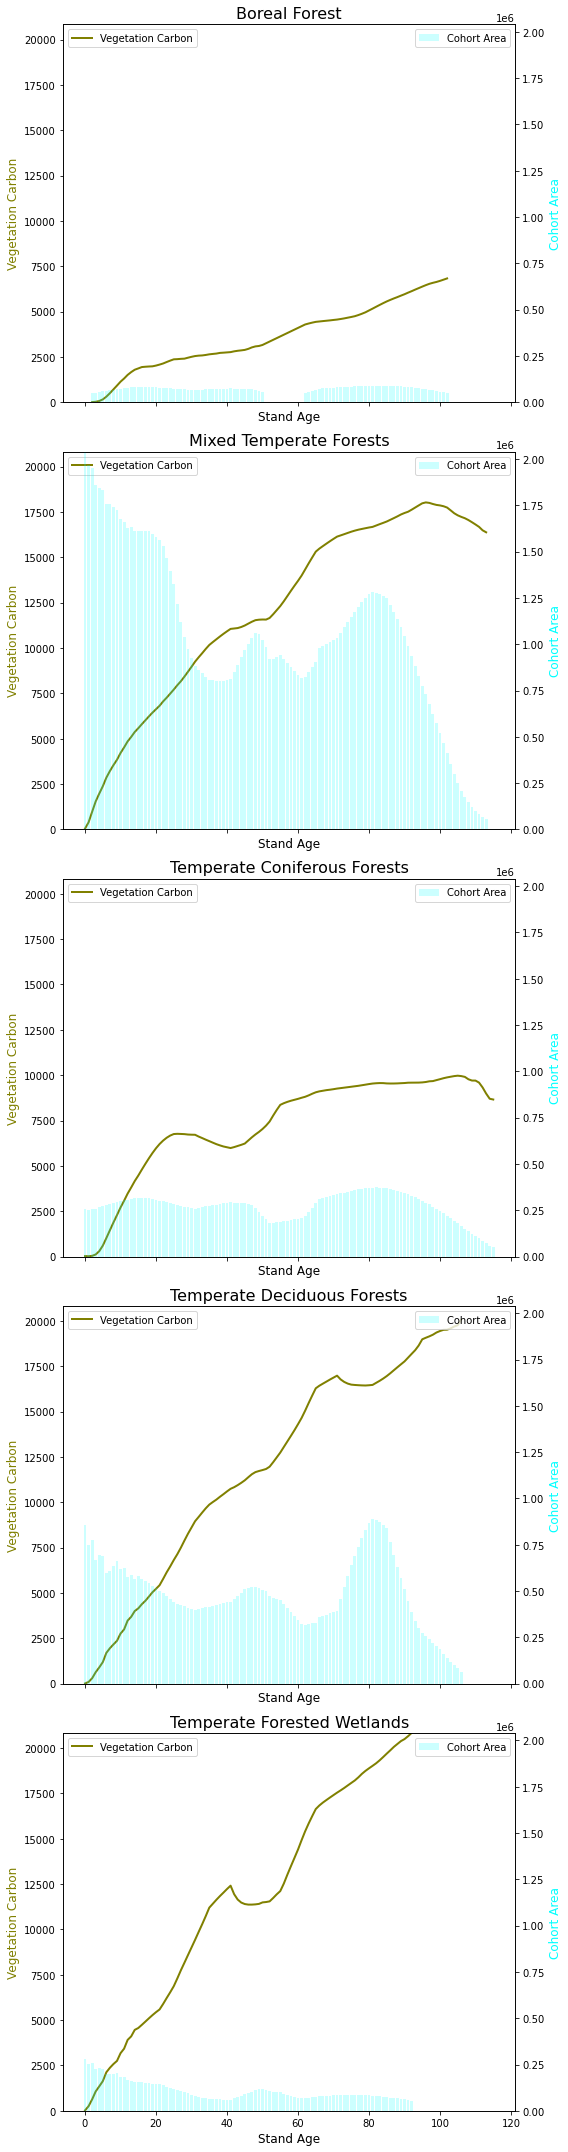

In [165]:
tics = np.arange(0, 121, 20)
# Group the data by the 'group' column
groups = all_grids2.groupby('forest_type')

# Create subplots for each group
fig, axs = plt.subplots(len(groups),1, sharex=True,  figsize=(8, 30))
# Iterate over each group and plot the data
# for i, (group, all_grids3) in enumerate(groups):
#     axs[i].plot(all_grids3['stand_age'], all_grids3['vegc_weight'])
#     axs[i].set_ylabel(f'Group {group}')
for i, (group, all_grids3) in enumerate(groups):
    ax1 = axs[i]  # Line plot axis
    ax2 = ax1.twinx()  # Bar plot axis

    # Line plot
    ax1.plot(all_grids3['stand_age'], all_grids3['vegc_weight'], color='olive', linewidth=2)
    ax1.set_ylabel('Vegetation Carbon', color='olive', fontsize=12)

    # Bar plot
    ax2.bar(all_grids3['stand_age'], all_grids3['cohort_area'], color='cyan', alpha=.2)
    ax2.set_ylabel('Cohort Area', color='cyan', fontsize=12)

    # Set y-axis limits for each variable
    ax1.set_ylim(0, all_grids2['vegc_weight'].max())
    ax2.set_ylim(0, all_grids2['cohort_area'].max()+50)

    # Add a legend for each variable
    ax1.legend(['Vegetation Carbon'], loc='upper left', fontsize=10)
    ax2.legend(['Cohort Area'], loc='upper right', fontsize=10)

    # Set common x-label for the entire subplot
    ax1.set_xlabel('Stand Age', fontsize=12)
    # ax1.tick_params(axis='x', width=25)
    ax1.set_xticks(tics)
    ax1.set_xticklabels(tics)

    ax1.set_title(f'{group}', fontsize=16)
# Set common labels and title
# plt.xlabel('Stand Age')
# plt.suptitle('Individual Plots for Each Group')

# Adjust subplot spacing
plt.tight_layout()

# Display the plot
plt.show()


In [59]:

aggregations = {
 'total_area':'sum',
'prec_temp':'sum',
'par_temp':'sum',
'tair_temp':'sum',
'clds_temp':'sum',
'vpr_temp':'sum'
}
all_grids['prec_temp'] = all_grids['prec'] * all_grids['total_area']
all_grids['par_temp'] = all_grids['par'] * all_grids['total_area']
all_grids['tair_temp'] = all_grids['tair'] * all_grids['total_area']
all_grids['clds_temp'] = all_grids['clds'] * all_grids['total_area']
all_grids['vpr_temp'] = all_grids['vpr'] * all_grids['total_area']


annual_climate = all_grids.groupby([
        'year']).agg(
aggregations
)


# all_grids =  all_grids.reset_index()

annual_climate['prec'] = annual_climate['prec_temp'] / annual_climate['total_area']
annual_climate['par'] = annual_climate['par_temp'] / annual_climate['total_area']
annual_climate['tair'] = annual_climate['tair_temp'] / annual_climate['total_area']
annual_climate['clds'] = annual_climate['clds_temp'] / annual_climate['total_area']
annual_climate['vpr'] = annual_climate['vpr_temp'] / annual_climate['total_area']


In [62]:
annual_climate = annual_climate.reset_index()

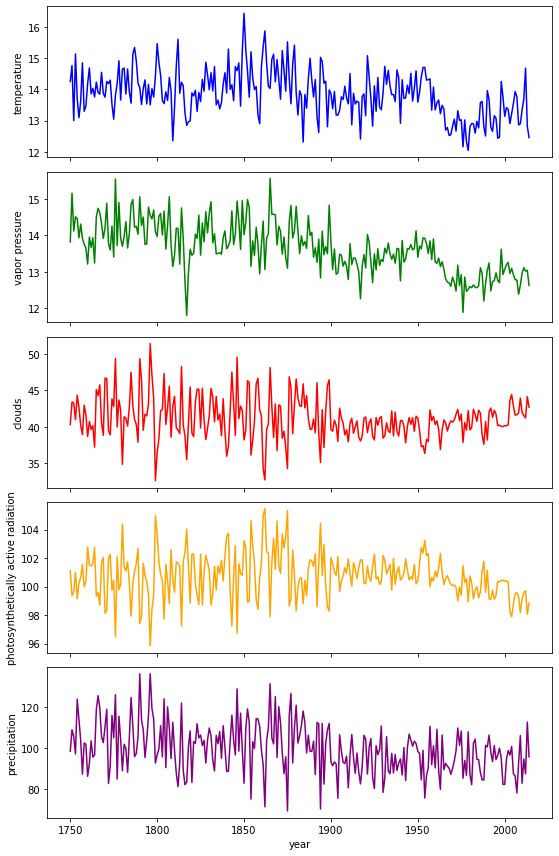

In [66]:
fig, axs = plt.subplots(5, 1, sharex=True, figsize=(8, 12))

# Plot the data on each subplot
axs[0].plot(annual_climate['year'], annual_climate['tair'], color='blue')
axs[0].set_ylabel('temperature')

axs[1].plot(annual_climate['year'], annual_climate['vpr'], color='green')
axs[1].set_ylabel('vapor pressure')

axs[2].plot(annual_climate['year'], annual_climate['clds'], color='red')
axs[2].set_ylabel('clouds')

axs[3].plot(annual_climate['year'], annual_climate['par'], color='orange')
axs[3].set_ylabel('photosynthetically active radiation')

axs[4].plot(annual_climate['year'], annual_climate['prec'], color='purple')
axs[4].set_ylabel('precipitation')

# Set labels and title for the entire figure
plt.xlabel('year')

# plt.suptitle('Multiple Variables with Different Y-Axes')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()
